<a href="https://colab.research.google.com/github/syedaquib153/Time-Series-Forecasting/blob/main/Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import itertools
import warnings
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.4f" % x)

import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt

warnings.filterwarnings("ignore")


In [2]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/query_result_2023-07-12T15_33_26.294974Z.csv')

In [4]:
df

,id,created_date,updated_date,item_id,section,viewCount,likeCount,commentCount,favoriteCount,automation_config_id
0,a890ae13-e946-437b-94d7-eaa9540af79a,2023-07-03T07:54:00.873451Z,2023-07-03T07:54:00.873454Z,C0mj8aOALMk,VIDEO,3525275,279501,13596,0,381696d1-5259-4016-97f7-26346a1722da
1,8cc46deb-a309-468d-a508-cff21a8b8622,2023-07-03T07:54:00.873472Z,2023-07-03T07:54:00.873476Z,C0mj8aOALMk,VIDEO,3525275,279501,13596,0,cfddb3f5-7a40-4065-b272-070fba6a9186
2,0f5a5b9b-0a20-4fba-96f0-b5f01c0752c1,2023-07-03T07:56:01.378395Z,2023-07-03T07:56:01.378399Z,C0mj8aOALMk,VIDEO,3527701,279547,13596,0,381696d1-5259-4016-97f7-26346a1722da
3,0fb55f00-19ba-4508-bd24-147e854c35f9,2023-07-03T07:56:01.378417Z,2023-07-03T07:56:01.378421Z,C0mj8aOALMk,VIDEO,3527701,279547,13596,0,cfddb3f5-7a40-4065-b272-070fba6a9186
4,15f1c5a7-ce37-4d1c-b817-cf4cfacfaa20,2023-07-03T07:58:00.892726Z,2023-07-03T07:58:00.89273Z,C0mj8aOALMk,VIDEO,3527701,279601,13595,0,381696d1-5259-4016-97f7-26346a1722da
...,...,...,...,...,...,...,...,...,...,...
164797,e5cab267-9e42-4dda-a002-3d31fd72af0a,2023-07-12T15:24:00.744931Z,2023-07-12T15:24:00.744934Z,C0mj8aOALMk,VIDEO,4817706,324403,13269,0,d9d69f64-ed86-4e7e-a318-8555e5d426d0
164798,34dc675e-d221-47e5-8449-47dc253427cb,2023-07-12T15:26:00.861722Z,2023-07-12T15:26:00.861725Z,C0mj8aOALMk,VIDEO,4817998,324410,13269,0,d9d69f64-ed86-4e7e-a318-8555e5d426d0
164799,bca08bb8-8730-4fb7-b188-6cf5362e1116,2023-07-12T15:28:00.963687Z,2023-07-12T15:28:00.96369Z,C0mj8aOALMk,VIDEO,4817998,324412,13269,0,d9d69f64-ed86-4e7e-a318-8555e5d426d0
164800,5da950be-ae12-423d-8edb-a3493ac864c1,2023-07-12T15:30:00.764379Z,2023-07-12T15:30:00.764382Z,C0mj8aOALMk,VIDEO,4818262,324418,13269,0,d9d69f64-ed86-4e7e-a318-8555e5d426d0


In [5]:
df.nunique()

id                      164802
created_date            164802
updated_date            164802
item_id                      1
section                      1
viewCount                 2789
likeCount                 5688
commentCount               214
favoriteCount                1
automation_config_id        43
dtype: int64

Basic Cleaning

In [6]:
df.describe()

,viewCount,likeCount,commentCount,favoriteCount
count,164802.0000,164802.0000,164802.0000,164802.0000
mean,4465552.0474,313656.9091,13194.9810,0.0000
std,209298.1857,6807.4292,74.8933,0.0000
min,3525275.0000,279501.0000,13009.0000,0.0000
25%,4335164.0000,309695.0000,13144.0000,0.0000
50%,4506285.0000,315174.0000,13225.0000,0.0000
75%,4647014.0000,319176.0000,13248.0000,0.0000
max,4818262.0000,324422.0000,13687.0000,0.0000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164802 entries, 0 to 164801
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    164802 non-null  object
 1   created_date          164802 non-null  object
 2   updated_date          164802 non-null  object
 3   item_id               164802 non-null  object
 4   section               164802 non-null  object
 5   viewCount             164802 non-null  int64 
 6   likeCount             164802 non-null  int64 
 7   commentCount          164802 non-null  int64 
 8   favoriteCount         164802 non-null  int64 
 9   automation_config_id  164802 non-null  object
dtypes: int64(4), object(6)
memory usage: 12.6+ MB


In [8]:
df['updated_date']= pd.to_datetime(df['updated_date'])


In [9]:
df.head()

,id,created_date,updated_date,item_id,section,viewCount,likeCount,commentCount,favoriteCount,automation_config_id
0,a890ae13-e946-437b-94d7-eaa9540af79a,2023-07-03T07:54:00.873451Z,2023-07-03 07:54:00.873454+00:00,C0mj8aOALMk,VIDEO,3525275,279501,13596,0,381696d1-5259-4016-97f7-26346a1722da
1,8cc46deb-a309-468d-a508-cff21a8b8622,2023-07-03T07:54:00.873472Z,2023-07-03 07:54:00.873476+00:00,C0mj8aOALMk,VIDEO,3525275,279501,13596,0,cfddb3f5-7a40-4065-b272-070fba6a9186
2,0f5a5b9b-0a20-4fba-96f0-b5f01c0752c1,2023-07-03T07:56:01.378395Z,2023-07-03 07:56:01.378399+00:00,C0mj8aOALMk,VIDEO,3527701,279547,13596,0,381696d1-5259-4016-97f7-26346a1722da
3,0fb55f00-19ba-4508-bd24-147e854c35f9,2023-07-03T07:56:01.378417Z,2023-07-03 07:56:01.378421+00:00,C0mj8aOALMk,VIDEO,3527701,279547,13596,0,cfddb3f5-7a40-4065-b272-070fba6a9186
4,15f1c5a7-ce37-4d1c-b817-cf4cfacfaa20,2023-07-03T07:58:00.892726Z,2023-07-03 07:58:00.892730+00:00,C0mj8aOALMk,VIDEO,3527701,279601,13595,0,381696d1-5259-4016-97f7-26346a1722da


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164802 entries, 0 to 164801
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   id                    164802 non-null  object             
 1   created_date          164802 non-null  object             
 2   updated_date          164802 non-null  datetime64[ns, UTC]
 3   item_id               164802 non-null  object             
 4   section               164802 non-null  object             
 5   viewCount             164802 non-null  int64              
 6   likeCount             164802 non-null  int64              
 7   commentCount          164802 non-null  int64              
 8   favoriteCount         164802 non-null  int64              
 9   automation_config_id  164802 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(4), object(5)
memory usage: 12.6+ MB


In [11]:
#defining a datainfoAll
def datainfoAll(df):
   print(f"Dataset Shape: {df.shape}")
   print("-"*125)
   summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
   summary = summary.reset_index()
   summary['Name'] = summary['index']
   summary = summary[['Name','dtypes']]
   summary['Missing'] = df.isnull().sum().values
   summary['Uniques'] = df.nunique().values
   summary['First Value'] = df.iloc[0].values
   summary['Third Value'] = df.iloc[2].values
   return summary

In [12]:
datainfoAll(df)

Dataset Shape: (164802, 10)
-----------------------------------------------------------------------------------------------------------------------------


,Name,dtypes,Missing,Uniques,First Value,Third Value
0,id,object,0,164802,a890ae13-e946-437b-94d7-eaa9540af79a,0f5a5b9b-0a20-4fba-96f0-b5f01c0752c1
1,created_date,object,0,164802,2023-07-03T07:54:00.873451Z,2023-07-03T07:56:01.378395Z
2,updated_date,"datetime64[ns, UTC]",0,164802,2023-07-03 07:54:00.873454+00:00,2023-07-03 07:56:01.378399+00:00
3,item_id,object,0,1,C0mj8aOALMk,C0mj8aOALMk
4,section,object,0,1,VIDEO,VIDEO
5,viewCount,int64,0,2789,3525275,3527701
6,likeCount,int64,0,5688,279501,279547
7,commentCount,int64,0,214,13596,13596
8,favoriteCount,int64,0,1,0,0
9,automation_config_id,object,0,43,381696d1-5259-4016-97f7-26346a1722da,381696d1-5259-4016-97f7-26346a1722da


In [13]:
#Checking for NaN Values
nan_check=pd.DataFrame({"No of Total Values":df.shape[0],"No of Nan Values":df.isnull().sum(),
                        "Percentage Of Nan Values": round((df.isnull().sum()/ df.shape[0])*100 , 2)})
nan_check.sort_values("No of Nan Values" , ascending = False)

,No of Total Values,No of Nan Values,Percentage Of Nan Values
id,164802,0,0.0000
created_date,164802,0,0.0000
updated_date,164802,0,0.0000
item_id,164802,0,0.0000
section,164802,0,0.0000
viewCount,164802,0,0.0000
likeCount,164802,0,0.0000
commentCount,164802,0,0.0000
favoriteCount,164802,0,0.0000
automation_config_id,164802,0,0.0000


In [14]:
df['updated_date']=pd.to_datetime(df['updated_date'])
df['Date'] = pd.to_datetime(df['updated_date']).dt.date
df['Time'] = pd.to_datetime(df['updated_date']).dt.time
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df['hour'] = pd.to_datetime(df['updated_date']).dt.hour


In [15]:
df.head()

,id,created_date,updated_date,item_id,section,viewCount,likeCount,commentCount,favoriteCount,automation_config_id,Date,Time,hour
0,a890ae13-e946-437b-94d7-eaa9540af79a,2023-07-03T07:54:00.873451Z,2023-07-03 07:54:00.873454+00:00,C0mj8aOALMk,VIDEO,3525275,279501,13596,0,381696d1-5259-4016-97f7-26346a1722da,2023-07-03,07:54:00.873454,7
1,8cc46deb-a309-468d-a508-cff21a8b8622,2023-07-03T07:54:00.873472Z,2023-07-03 07:54:00.873476+00:00,C0mj8aOALMk,VIDEO,3525275,279501,13596,0,cfddb3f5-7a40-4065-b272-070fba6a9186,2023-07-03,07:54:00.873476,7
2,0f5a5b9b-0a20-4fba-96f0-b5f01c0752c1,2023-07-03T07:56:01.378395Z,2023-07-03 07:56:01.378399+00:00,C0mj8aOALMk,VIDEO,3527701,279547,13596,0,381696d1-5259-4016-97f7-26346a1722da,2023-07-03,07:56:01.378399,7
3,0fb55f00-19ba-4508-bd24-147e854c35f9,2023-07-03T07:56:01.378417Z,2023-07-03 07:56:01.378421+00:00,C0mj8aOALMk,VIDEO,3527701,279547,13596,0,cfddb3f5-7a40-4065-b272-070fba6a9186,2023-07-03,07:56:01.378421,7
4,15f1c5a7-ce37-4d1c-b817-cf4cfacfaa20,2023-07-03T07:58:00.892726Z,2023-07-03 07:58:00.892730+00:00,C0mj8aOALMk,VIDEO,3527701,279601,13595,0,381696d1-5259-4016-97f7-26346a1722da,2023-07-03,07:58:00.892730,7


In [16]:
# Set index as time column
from datetime import datetime
df.set_index('updated_date',inplace=True)

In [17]:
columns_to_drop=['id','created_date','item_id','section','likeCount','commentCount','favoriteCount','automation_config_id','Time','hour']

In [18]:
df.drop(columns_to_drop,axis=1,inplace=True)

In [19]:
df.head()

,viewCount,Date
updated_date,,
2023-07-03 07:54:00.873454+00:00,3525275,2023-07-03
2023-07-03 07:54:00.873476+00:00,3525275,2023-07-03
2023-07-03 07:56:01.378399+00:00,3527701,2023-07-03
2023-07-03 07:56:01.378421+00:00,3527701,2023-07-03
2023-07-03 07:58:00.892730+00:00,3527701,2023-07-03


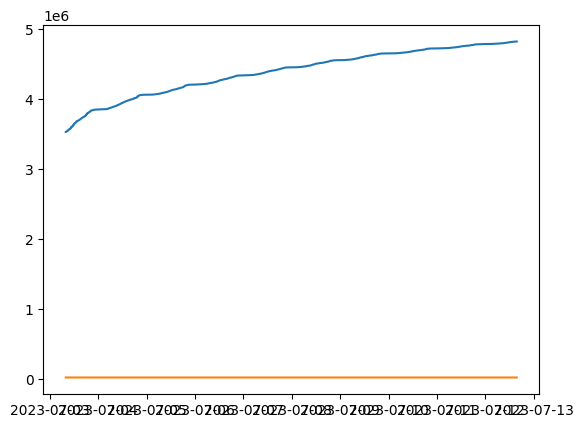

In [20]:
plt.plot(df)

In [21]:
#Determing the rolling statics
rollmean=df.rolling(window=12).mean()
rollstd=df.rolling(window=12).std()

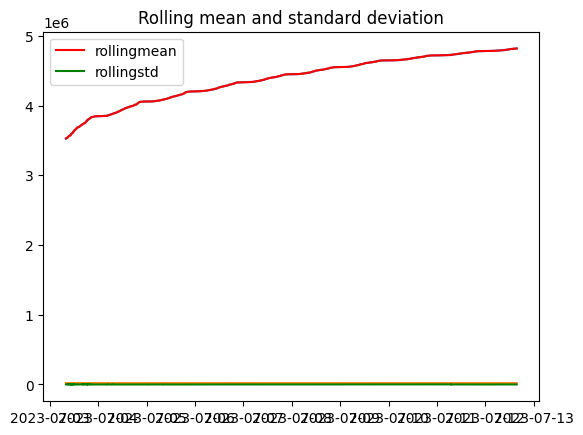

In [22]:
#plotrolling statistics
plt.plot(df)
mean=plt.plot(rollmean,color='red',label='rollingmean')
std=plt.plot(rollstd,color='green',label='rollingstd')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation')
plt.show()

In [23]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

In [24]:
def adfuller_test(views):
    result=adfuller(df['viewCount'])
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller_test(df['viewCount'])

ADF Test Statistic : -9.048238513299665
p-value : 4.919705541050996e-15
#Lags Used : 77
Number of Observations Used : 164724
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [25]:
df['view First Difference']=df['viewCount']-df['viewCount'].shift(12)
df.head(14)

,viewCount,Date,view First Difference
updated_date,,,
2023-07-03 07:54:00.873454+00:00,3525275,2023-07-03,NaN
2023-07-03 07:54:00.873476+00:00,3525275,2023-07-03,NaN
2023-07-03 07:56:01.378399+00:00,3527701,2023-07-03,NaN
2023-07-03 07:56:01.378421+00:00,3527701,2023-07-03,NaN
2023-07-03 07:58:00.892730+00:00,3527701,2023-07-03,NaN
2023-07-03 07:58:00.892751+00:00,3527701,2023-07-03,NaN
2023-07-03 07:58:00.892773+00:00,3527701,2023-07-03,NaN
2023-07-03 07:58:00.892794+00:00,3527701,2023-07-03,NaN
2023-07-03 08:00:01.223338+00:00,3529775,2023-07-03,NaN


In [26]:
adfuller_test(df['view First Difference'].dropna())

ADF Test Statistic : -9.048238513299665
p-value : 4.919705541050996e-15
#Lags Used : 77
Number of Observations Used : 164724
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


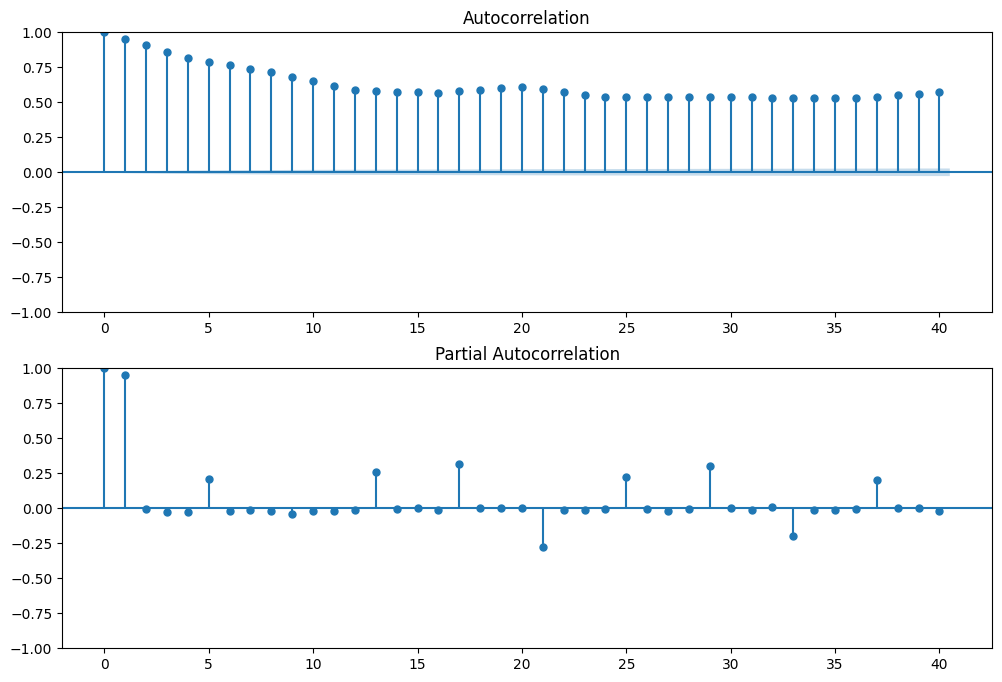

In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['view First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['view First Difference'].iloc[13:],lags=40,ax=ax2)

In [28]:
df.dropna(inplace=True)


In [29]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['viewCount'].values, order=(2,1,1))
model_fit=model.fit()

In [30]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:               164790
Model:                 ARIMA(2, 1, 1)   Log Likelihood             -986712.637
Date:                Mon, 31 Jul 2023   AIC                        1973433.274
Time:                        09:12:06   BIC                        1973473.324
Sample:                             0   HQIC                       1973445.162
                             - 164790                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       9.933e-06      0.760   1.31e-05      1.000      -1.490       1.490
ar.L2          0.0063      0.001      4.654      0.000       0.004       0.009
ma.L1      -4.996e-05      0.752  -6.64e-05      1.000      -1.475       1.475
sigma2      9297.0587      1.756   5295.035      0.000    9293.617    9300.500
===================================================================================
Ljung-Box (L1) (Q):                   7.04   Jarque-Bera (JB):        3193193151.15
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                            21.57
Prob(H) (two-sided):                  0.00   Kurtosis:                       683.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
df.dropna()

,viewCount,Date,view First Difference
updated_date,,,
2023-07-03 08:02:01.304484+00:00,3529775,2023-07-03,4500.0000
2023-07-03 08:02:01.304506+00:00,3529775,2023-07-03,4500.0000
2023-07-03 08:02:01.304528+00:00,3529775,2023-07-03,2074.0000
2023-07-03 08:02:01.304550+00:00,3529775,2023-07-03,2074.0000
2023-07-03 08:04:00.903872+00:00,3529775,2023-07-03,2074.0000
...,...,...,...
2023-07-12 15:24:00.744934+00:00,4817706,2023-07-12,1013.0000
2023-07-12 15:26:00.861725+00:00,4817998,2023-07-12,1209.0000
2023-07-12 15:28:00.963690+00:00,4817998,2023-07-12,1209.0000


In [32]:
df.drop(['Date','view First Difference'],axis=1,inplace=True)

In [33]:
df.tail()

,viewCount
updated_date,
2023-07-12 15:24:00.744934+00:00,4817706
2023-07-12 15:26:00.861725+00:00,4817998
2023-07-12 15:28:00.963690+00:00,4817998
2023-07-12 15:30:00.764382+00:00,4818262
2023-07-12 15:32:00.857596+00:00,4818262


In [34]:
X = df.values  # Using 'viewCount' as the only feature
y = df.values

# Split the data into training and testing sets
train_size = int(len(df) * 0.90)  # 80% for training, 20% for testing
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

p, d, q = 2, 1, 1  # Adjust these values based on your ACF/PACF plots and information criteria

# Train the ARIMA Model
model = ARIMA(y_test, order=(p, d, q))
model_fit = model.fit()

In [35]:
X

array([[3529775],
       [3529775],
       [3529775],
       ...,
       [4817998],
       [4818262],
       [4818262]])

In [36]:
y

array([[3529775],
       [3529775],
       [3529775],
       ...,
       [4817998],
       [4818262],
       [4818262]])

In [37]:
print(X_test)

[[4701282]
 [4701282]
 [4701282]
 ...
 [4817998]
 [4818262]
 [4818262]]


In [38]:
print(y_test)

[[4701282]
 [4701282]
 [4701282]
 ...
 [4817998]
 [4818262]
 [4818262]]


In [39]:
print(y_train)

[[3529775]
 [3529775]
 [3529775]
 ...
 [4701282]
 [4701282]
 [4701282]]


In [40]:

# Make Predictions for the next 24 hours using the model
forecast_steps = 72
forecast = model_fit.forecast(steps=forecast_steps)

# Print the forecasted values
print("Forecasted Values:")
print(forecast)

Forecasted Values:
[4818328.14498554 4818390.84347109 4818453.36012632 4818515.54367624
 4818577.40299658 4818638.93944493 4818700.15472212 4818761.05050368
 4818821.62845715 4818881.89024134 4818941.83750642 4819001.47189391
 4819060.79503681 4819119.80855956 4819178.51407812 4819236.91320006
 4819295.0075245  4819352.79864226 4819410.28813584 4819467.47757947
 4819524.36853918 4819580.96257283 4819637.26123013 4819693.26605272
 4819748.97857418 4819804.4003201  4819859.53280808 4819914.37754784
 4819968.93604119 4820023.20978212 4820077.2002568  4820130.90894367
 4820184.33731343 4820237.48682912 4820290.35894613 4820342.95511228
 4820395.27676781 4820447.32534545 4820499.10227044 4820550.60896061
 4820601.84682636 4820652.81727075 4820703.5216895  4820753.96147107
 4820804.13799665 4820854.05264022 4820903.70676861 4820953.10174151
 4821002.23891149 4821051.11962409 4821099.74521781 4821148.11702418
 4821196.23636776 4821244.10456621 4821291.72293031 4821339.092764
 4821386.21536442

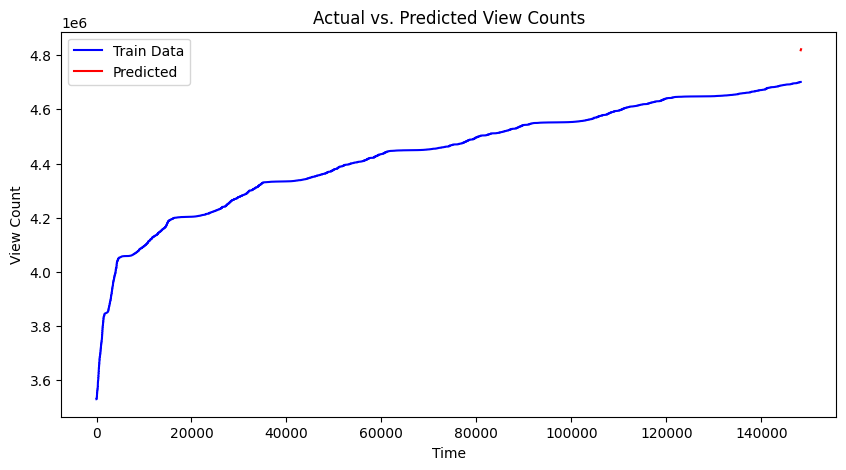

In [41]:
# Plot the actual, predicted values
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(y_train)), y_train, label='Train Data', color='blue')

plt.plot(np.arange(len(y_train), len(y_train) + forecast_steps), forecast, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('View Count')
plt.title('Actual vs. Predicted View Counts')
plt.legend()
plt.show()

In [42]:

# Create a DataFrame to store the forecasted values with appropriate timestamps
forecast_index = pd.date_range(start=df.index[train_size], periods=forecast_steps, freq='H')
forecast_df = pd.DataFrame({'forecasted_value': forecast}, index=forecast_index)

# Print the forecasted values with time
print(forecast_df)

                                  forecasted_value
2023-07-10 17:14:01.098253+00:00      4818328.1450
2023-07-10 18:14:01.098253+00:00      4818390.8435
2023-07-10 19:14:01.098253+00:00      4818453.3601
2023-07-10 20:14:01.098253+00:00      4818515.5437
2023-07-10 21:14:01.098253+00:00      4818577.4030
...                                            ...
2023-07-13 12:14:01.098253+00:00      4821888.6108
2023-07-13 13:14:01.098253+00:00      4821932.8654
2023-07-13 14:14:01.098253+00:00      4821976.8890
2023-07-13 15:14:01.098253+00:00      4822020.6828
2023-07-13 16:14:01.098253+00:00      4822064.2480

[72 rows x 1 columns]


In [43]:
df.tail()

,viewCount
updated_date,
2023-07-12 15:24:00.744934+00:00,4817706
2023-07-12 15:26:00.861725+00:00,4817998
2023-07-12 15:28:00.963690+00:00,4817998
2023-07-12 15:30:00.764382+00:00,4818262
2023-07-12 15:32:00.857596+00:00,4818262


In [44]:
forecast_df[47:]

,forecasted_value
2023-07-12 16:14:01.098253+00:00,4820953.1017
2023-07-12 17:14:01.098253+00:00,4821002.2389
2023-07-12 18:14:01.098253+00:00,4821051.1196
2023-07-12 19:14:01.098253+00:00,4821099.7452
2023-07-12 20:14:01.098253+00:00,4821148.1170
2023-07-12 21:14:01.098253+00:00,4821196.2364
2023-07-12 22:14:01.098253+00:00,4821244.1046
2023-07-12 23:14:01.098253+00:00,4821291.7229
2023-07-13 00:14:01.098253+00:00,4821339.0928
2023-07-13 01:14:01.098253+00:00,4821386.2154


<Axes: >

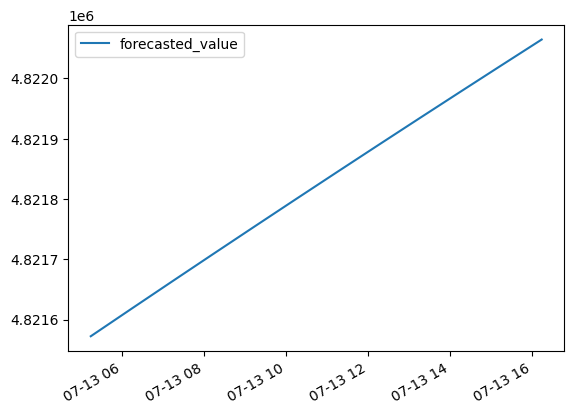

In [45]:
forecast_df[60:].plot()